In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('sklearn-pred-prob.csv')

In [3]:
data.head()

,season,round,tie,made_minute,away,game,t1goaldiff,t1awaygoaldiff,t1home,stoppagetime,...,t2,winner,t1win,homewing1,drawg1,awaywing1,homewing2,drawg2,awaywing2,probt1win
0,2008,first,arsenal-milan,1.0,NaN,1,0,0,1,0,...,milan,arsenal,1,0.452474,0.314634,0.232891,0.0,0.0,0.0,0.487575
1,2008,first,arsenal-milan,2.0,NaN,1,0,0,1,0,...,milan,arsenal,1,0.452474,0.314634,0.232891,0.0,0.0,0.0,0.487759
2,2008,first,arsenal-milan,3.0,NaN,1,0,0,1,0,...,milan,arsenal,1,0.452474,0.314634,0.232891,0.0,0.0,0.0,0.487943
3,2008,first,arsenal-milan,4.0,NaN,1,0,0,1,0,...,milan,arsenal,1,0.452474,0.314634,0.232891,0.0,0.0,0.0,0.488128
4,2008,first,arsenal-milan,5.0,NaN,1,0,0,1,0,...,milan,arsenal,1,0.452474,0.314634,0.232891,0.0,0.0,0.0,0.488312


In [4]:
data[['season','round','tie','winner']].drop_duplicates()

,season,round,tie,winner
0,2008,first,arsenal-milan,arsenal
184,2008,first,celtic-barcelona,barcelona
368,2008,first,fenerbahce-sevilla,fenerbahce
585,2008,first,liverpool-inter,liverpool
769,2008,first,lyon-united,united
953,2008,first,olympiacos-chelsea,chelsea
1137,2008,first,roma-madrid,roma
1321,2008,first,schalke-porto,schalke
1538,2008,qtr,arsenal-liverpool,liverpool
1722,2008,qtr,fenerbahce-chelsea,chelsea


Text(0.5, 1.0, 'United vs. Psg\n 2019 Round of 16')

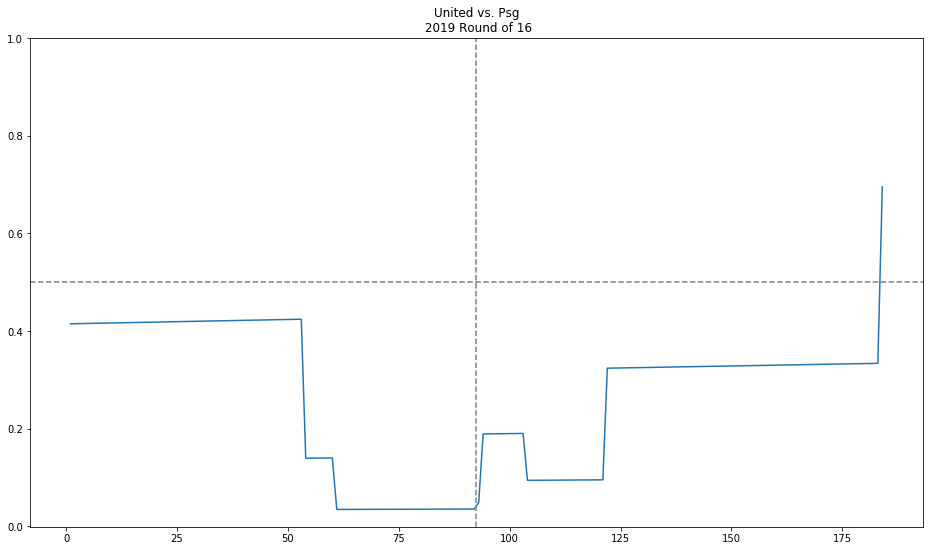

In [5]:
y = 2019
r = 'first'
t = 'united-psg'

probs = data[(data.season == y) & (data.tie == t) & (data['round'] == r)]

plt.figure(figsize = (16,9))
plt.plot(
    probs.made_minute,
    probs.probt1win
)
plt.ylim(-0.001, 1.001)
plt.axhline(0.5, linestyle='--', color='grey')
plt.axvline(92.5, linestyle='--', color='grey')
if probs.made_minute.max() > 184:
    plt.axvline(184.5, linestyle='--', color='grey')

def make_title(y, r, t):
    convert = {'first':'Round of 16', 'qtr':'Quarterfinal', 'semi':'Semifinal'}
    plottitle = ' vs. '.join([s.capitalize() for s in t.split('-')])
    plottitle += f'\n {y} {convert[r]}'
    
    return plottitle

plt.title(make_title(y, r, t))